## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='iex', start='2015-1-1')['close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

5y


***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    100.13
Name: 2018-06-15, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0] = S0
price_list

array([[100.13, 100.13, 100.13, ..., 100.13, 100.13, 100.13],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [7]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [8]:
price_list

array([[100.13      , 100.13      , 100.13      , ..., 100.13      ,
        100.13      , 100.13      ],
       [100.47149774,  99.00398132,  97.26171966, ...,  99.11144346,
        101.27792078, 101.10351224],
       [100.58623963,  98.80940192,  97.56748128, ...,  98.71564185,
        102.23842034,  99.70089055],
       ...,
       [159.4656647 , 132.5159627 , 111.8759664 , ..., 130.60684549,
        106.69418036, 126.27689774],
       [161.65688794, 130.20126295, 109.11601214, ..., 128.89976291,
        107.75020953, 123.70484127],
       [160.81243925, 134.73527592, 108.28564955, ..., 129.37586605,
        106.74416653, 122.53277109]])

Finally, plot the obtained price list data.

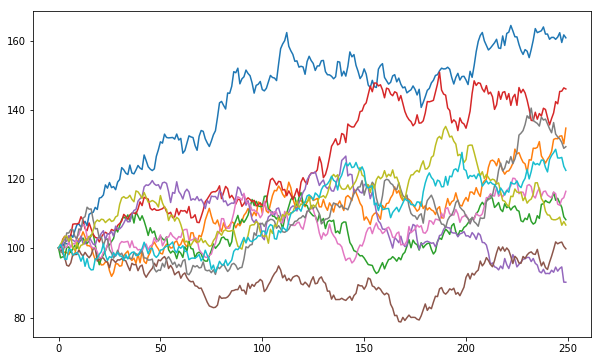

In [9]:
plt.figure(figsize=(10,6))
plt.plot(price_list);